In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
IMAGES_FOLDER_PATH = "../images"

# Question 1

###  1 (a)

In [3]:
fg = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'fg.jpg'))
fg = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)

# plt.imshow(fg)
# plt.show()

bg = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'bg.jpg'))
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

# plt.imshow(bg)
# plt.show()
print(fg.shape)
print(bg.shape)

(720, 1280, 3)
(720, 1280, 3)


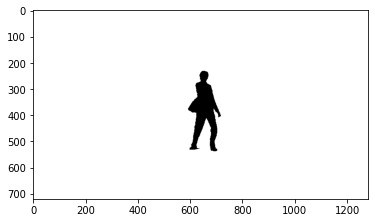

In [4]:
fg_copy = np.copy(fg)
# 86,255,32
lower_green = np.array([36, 200, 0])     #[R value, G value, B value]
upper_green = np.array([136, 255, 82]) 
mask = cv2.inRange(fg_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.show()

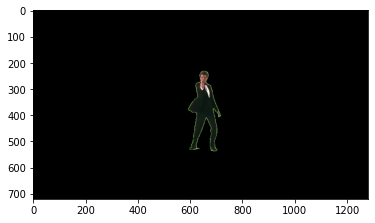

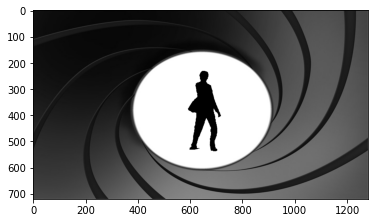

In [5]:
masked_image = np.copy(fg)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)
plt.show()
# px.imshow(masked_image).show()

crop_background = np.copy(bg)
crop_background[mask == 0] = [0,0,0]
plt.imshow(crop_background)
plt.show()
# px.imshow(crop_background).show()

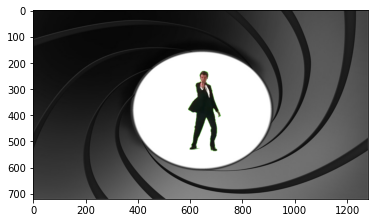

In [6]:
final_image = crop_background + masked_image
plt.imshow(final_image)
plt.show()
# px.imshow(final_image).show()

### 1(b)

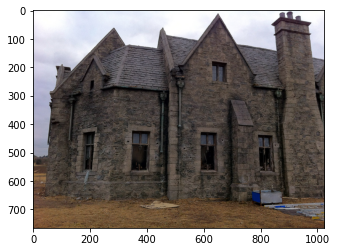

(765, 1024, 3)


In [7]:
mansion = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'skyfall_mansion.jpg'))
mansion = cv2.cvtColor(mansion, cv2.COLOR_BGR2RGB)
plt.imshow(mansion)
plt.show()
print(mansion.shape)

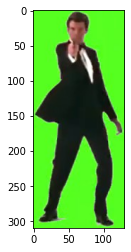

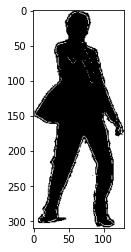

(310, 130, 3)


In [8]:
bond = fg[230:540,590:720]
plt.imshow(bond)
plt.show()

bond_copy = np.copy(bond)
lower_green = np.array([0, 80, 0])     ##[R value, G value, B value]
upper_green = np.array([100, 255, 100])

mask_bond = cv2.inRange(bond_copy, lower_green, upper_green)
plt.imshow(mask_bond, cmap='gray')
plt.show()
print(bond.shape)

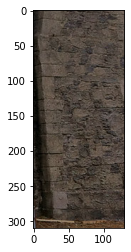

(310, 130, 3)


In [9]:
mansion_copy = np.copy(mansion)

crop_part_mansion = mansion_copy[360:360+310,870:870+130]
plt.imshow(crop_part_mansion)
plt.show()
print(crop_part_mansion.shape)

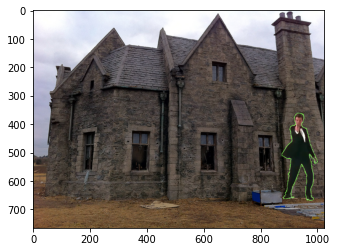

In [10]:
masked_image = np.copy(bond)
masked_image[mask_bond != 0] = [0, 0, 0]
# plt.imshow(masked_image)
# plt.show()

crop_background = np.copy(crop_part_mansion)
crop_background[mask_bond == 0] = [0,0,0]
# plt.imshow(crop_background)
# plt.show()

image_matting = crop_background + masked_image
# plt.imshow(final_image)
# plt.show()

mansion_copy[360:360+310,870:870+130] = image_matting

final_image = mansion_copy
plt.imshow(final_image)
plt.show()

### 1(c)

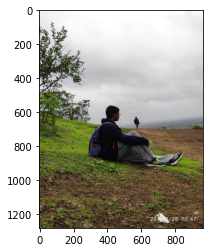

(1280, 960, 3)

In [11]:
ansh = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'ansh.jpg'))
ansh = cv2.cvtColor(ansh, cv2.COLOR_BGR2RGB)
plt.imshow(ansh)
plt.show()
ansh.shape

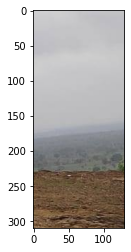

(310, 130, 3)

In [12]:
ansh_copy = np.copy(ansh)
crop_part_ansh = ansh_copy[470:470+310,770:770+130]
plt.imshow(crop_part_ansh)
plt.show()
crop_part_ansh.shape

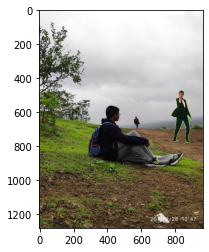

In [13]:
masked_image = np.copy(bond)
masked_image[mask_bond != 0] = [0, 0, 0]
# plt.imshow(masked_image)
# plt.show()

crop_background = np.copy(crop_part_ansh)
crop_background[mask_bond == 0] = [0,0,0]
# plt.imshow(crop_background)
# plt.show()

final_image = crop_background + masked_image
# plt.imshow(final_image)
# plt.show()

ansh_copy[470:470+310,770:770+130] = final_image
# plt.imshow(ansh_copy)
# plt.show()

final_image = ansh_copy
plt.imshow(final_image)
plt.show()

### 2)

The total cloud size is : 4GB ( 1 GB $=$  $2^{30}$ bytes)

Each pixel of color image has a size of 3 bytes, one for each of R,G and B intensities.

The size of the colour image is : $1280x720x3$ bytes

Number of images = cloud_size/image_size

In [14]:
image_size = 1280*720*3 #in bytes
cloud_size = 4*1024*1024*1024

print("The number of images which can be stored in the cloud is",int(cloud_size/image_size))

The number of images which can be stored in the cloud is 1553


# Question 2

Given the image is a square. 

Let the height and width of the image be $x$.

Image size = $3*x^2$ bytes

Since 1MB = $2^{20}$ bytes

$\implies$ $168.5*2^{20}$ = $3*x^2$

Therefore, $x$ = $\sqrt{\frac{168.5*2^{20}}{3}} = 7680$

In [15]:
# x * x * 24 = 168.75*1024*1024
print("Dimension of the image is",int(np.sqrt((168.75*1024*1024)/3)),"x",int(np.sqrt((168.75*1024*1024)/3)))

Dimension of the image is 7680 x 7680


# Question 3

The insignia height is $32.8cm$
$$\implies h = 32.8$$

The image of the insignia has to be atleast 50px.
The height of the image formed will be $\frac{1}{1024}*50 cm$
Therefore, $$ h' \approx 0.05 - (3)$$  

We know the following two relations in Optics,

$$\frac{h'}{h} = \frac{v}{u}  - (1)$$
$$\frac{1}{f} = \frac{1}{v} - \frac{1}{u} - (2)$$

Given,
$$ u = d$$

Since, the object is far away, $u >> 0$ which implies $$\frac{1}{u} \approx 0$$

Therefore, $$ v=f - (3)$$  

Using (3) in equation (1),

$$\frac{0.05}{32.8} = \frac{f}{d}$$

$$d = \frac{6.25*32.8}{0.05}$$

$$d = 4200 cm$$

Therefore the farthest distance from the insignia is $42m$.

# Question 4

### 1)

In [16]:
def bitQuantizeImage(img,k):
    return np.around(img*((2**k-1)/255)).astype(int)

### 2)

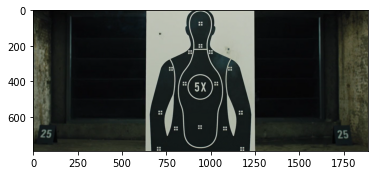

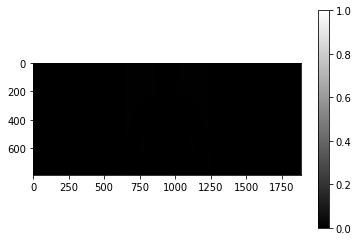

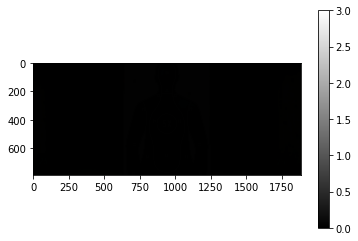

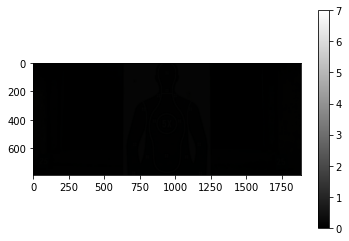

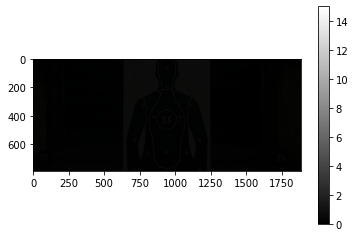

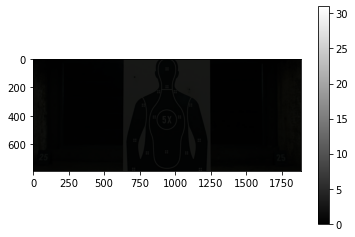

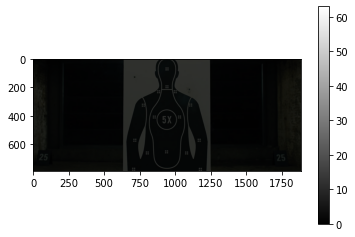

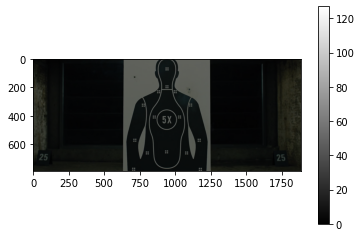

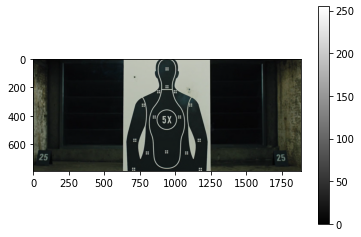

In [17]:
test_1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, '007_test1.png'))
test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)

plt.imshow(test_1)
plt.show()

# plt.imshow(test_1,cmap="gray")
# plt.show()

# fig = px.imshow(test_1)
# fig.show()

for i in range(1,9):
    quantized = bitQuantizeImage(test_1,i)
    plt.imshow(quantized,vmin = 0, vmax = (2**i -1),cmap="gray")
    plt.colorbar()
    plt.show()

### 3)

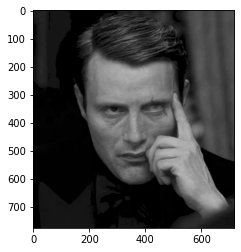

In [54]:
test_2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, '007_test2.png'),0)
test_2 = cv2.cvtColor(test_2, cv2.COLOR_BGR2RGB)
plt.imshow(test_2)
plt.show()

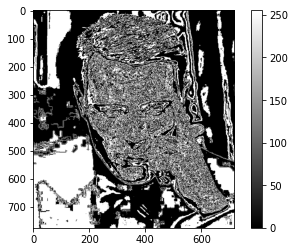

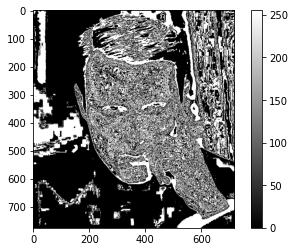

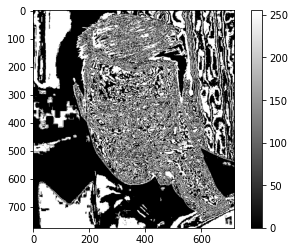

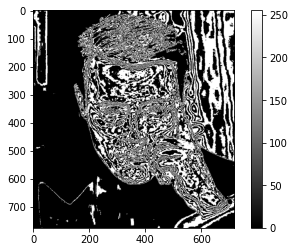

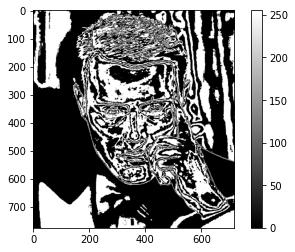

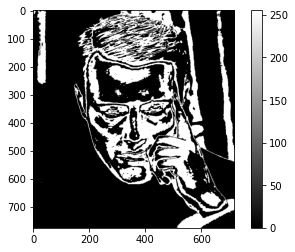

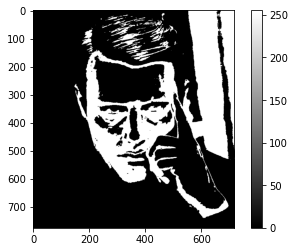

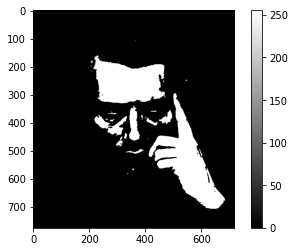

In [58]:
for i in range(8):
    bitwise = 255*(np.bitwise_and(test_2,2**i)/2**i).astype(int)
    plt.imshow(bitwise,vmin = 0, vmax = 255,cmap="gray")
    plt.colorbar()
    plt.show()

### 4)

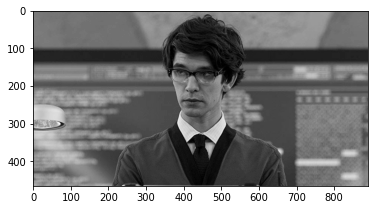

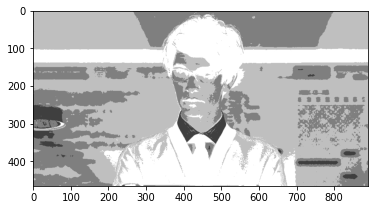

(466, 890)
(466, 890)


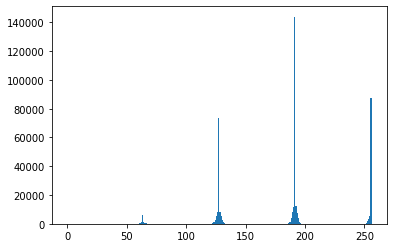

In [20]:
q = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'q.jpg'),0)
plt.imshow(q,cmap='gray',vmin=0,vmax=255)
plt.show()
q_corrupt = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'q_corrupt.jpg'),0)
plt.imshow(q_corrupt,cmap='gray',vmin=0,vmax=255)
plt.show()
print(q.shape)
print(q_corrupt.shape)

plt.hist(q_corrupt.ravel(),256,[0,256])
plt.show()

# x = np.bincount(q_corrupt.ravel())
# print(x)

2


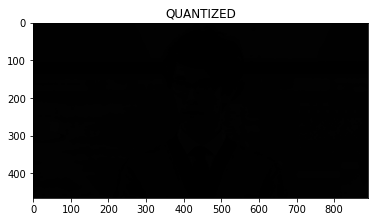

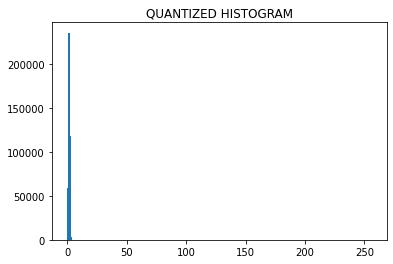

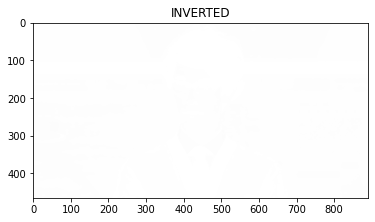

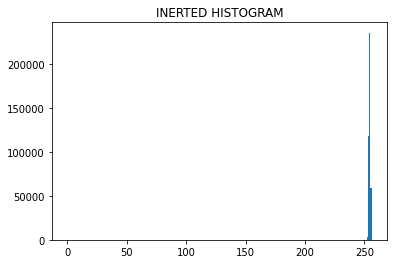

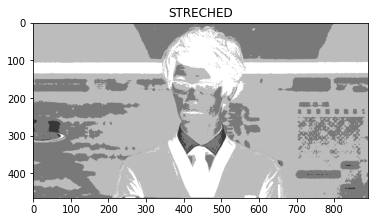

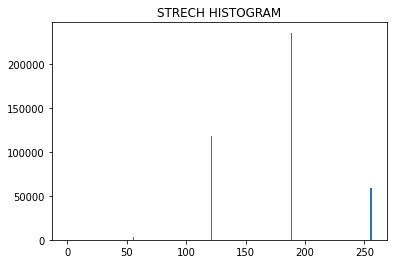

In [59]:
def bitQuantizeImage(img,k):
    return np.around(img*((2**k-1)/255)).astype(int)

def linContrastStretching(img,a,b):
    a_high = np.max(img)
    a_low = np.min(img)
    img = a+(img-a_low)*((b-a)/(a_high-a_low))
    img = img.astype(int)
    return img

def invert(img):
    return 255-img

# for i in range(2,3):
#     print(i)
#     inverted = invert(q)
#     plt.imshow(inverted,cmap='gray')
#     plt.title("INVERTED")
#     plt.show()
    
#     quantized = bitQuantizeImage(inverted,i)
#     plt.imshow(quantized,cmap='gray')
#     plt.title("QUANTIZED")
#     plt.show()
    
#     strech = linContrastStretching(quantized,55,255)
#     plt.imshow(strech,cmap='gray')
#     plt.title("STRECHED")
#     plt.show()
# vector = q_corrupt.ravel()

for i in range(2,3):
    print(i)
    
    quantized = bitQuantizeImage(q,i)
    
    
    plt.imshow(quantized,cmap='gray',vmin=0,vmax=255)
    plt.title("QUANTIZED")
    plt.show()
    plt.hist(quantized.ravel(),256,[0,256])
    plt.title("QUANTIZED HISTOGRAM")
    plt.show()
    
    inverted = invert(quantized)
    
    strech = linContrastStretching(inverted,55,255) 
    strech = (strech>=255)*255 + (strech<255)*strech
    plt.imshow(inverted,cmap='gray',vmin=0,vmax=255)
    plt.title("INVERTED")
    plt.show()
    plt.hist(inverted.ravel(),256,[0,256])
    plt.title("INERTED HISTOGRAM")
    plt.show()
    plt.imshow(strech,cmap='gray',vmin=0,vmax=255)
    plt.title("STRECHED")
    plt.show()
    plt.hist(strech.ravel(),256,[0,256])
    plt.title("STRECH HISTOGRAM")
    plt.show()
    
#     plt.imshow(q_corrupt,cmap='gray',vmin=0,vmax=255)
#     plt.title("CORRUPT")
#     plt.show()
    
#     x = np.bincount(inverted.ravel())
#     print(x)

### The closest visual similarity was obtained by quantizing the grayscale image to 2 bits and taking the negative. This was followed by a linear transformation/contrast streching
### The histogram of the corrupt image showed concentration of values along 4 different points. This lead to the assumption that the image was quantized to 2 bits.
### From visual inference, it was clear that the image was inverted.
### Linear Streching/Contrast was done on the transformed image to improve the contrast and bring it visually closer to the corrupted image

# Question 5

### 1)

In [22]:
#Vectorize this
def linContrastStretching(img,a,b):
    a_high = np.max(img)
    a_low = np.min(img)
    img = a+(img-a_low)*((b-a)/(a_high-a_low))
    img = img.astype(int)
    return img

### 2)

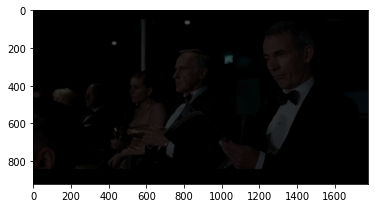

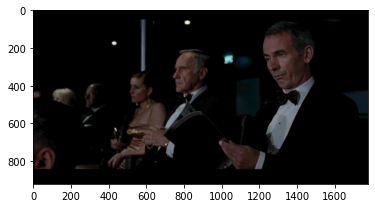

In [23]:
quantum = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'quantum_bad.jpg'))
quantum = cv2.cvtColor(quantum, cv2.COLOR_BGR2RGB)
plt.imshow(quantum)
plt.show()
# plt.hist(quantum.ravel())
# plt.title("ORIGINAL IMAGE")
# plt.show()

contrast = linContrastStretching(quantum,0,255)
plt.imshow(contrast)
plt.show()
# plt.hist(contrast.ravel())
# plt.title("STRECHED IMAGE")
# plt.show()

### 3)

Contrast Streching improves the contrast in an image by streching the pixel value onto a desired range.
It helps in reducing attentuation and also the density of pixels. In other words, it spreads out the densely packed values


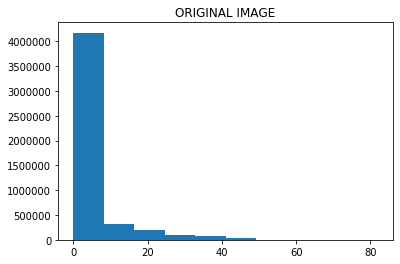
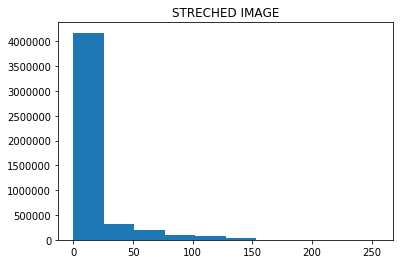

Comparing the histograms of the Q5) part 2, it is clear that how contrast strech helps in distributing the range of pixel values


In Linear contrast streching the transformation funtion $T$ is given by:
$$T(z) = a + (b-a)*\frac{(z-a_{low})}{(a_{high}-a_{low})}$$
where,<br />
$z$ is the pixel value of the input image <br />
$a_{high}$ is the highest pixel value in the input image <br />
$a_{low}$ is the lowest pixel value in the input image <br />
$a$ is the lowest pixel values on the output image <br />
$b$ is the highest pixel values on the output image <br />

# Question 6

In [24]:
map_img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'Map.jpg'),0)
# plt.imshow(map_img,cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(map_img.shape)
sat_map_img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'satellite_img.jpg'),0)
# plt.imshow(sat_map_img,cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(sat_map_img.shape)

### 1)

In [25]:
def histEqualization(img):
    plt.imshow(img,cmap='gray')
    plt.title("Original Image")
    plt.show()
    px_count = np.bincount(img.ravel())
    total_px = np.sum(px_count)
    px_count = np.cumsum(px_count)/total_px
#     print(px_count)
    equalized = np.around(255*px_count[img]).astype(int)
    plt.imshow(equalized,cmap='gray',vmin = 0, vmax=255)
    plt.title("Equalized Image")
    plt.show()
    return equalized

### 2)

In [26]:
def get_closest(arr,arr_keys,target):
    diff = arr[arr_keys]-target
    return arr_keys[np.argmin(np.abs(diff))]

def histMatching(img,ref_img):
    hist_img = np.bincount(img.ravel())
    hist_ref_img = np.bincount(ref_img.ravel())
    
    cdf_img = np.around(255*np.cumsum(hist_img)/np.product(img.shape)).astype(int)
    cdf_ref_img = np.around(255*np.cumsum(hist_ref_img)/np.product(ref_img.shape)).astype(int)
    
    pixel_img = np.nonzero(hist_img)[0] #non zero pixels in img
    pixel_ref_img = np.nonzero(hist_ref_img)[0] #non zero pixels in img
    
    transformation = np.full((256,1),0).astype(int)
        
    for x in pixel_img:
        temp = get_closest(cdf_ref_img,pixel_ref_img,cdf_img[x])
        transformation[x] = temp
                           
    return transformation[img][:,:,0]

### 3)

For Histogram Equalization, the transformation function $T$ is given by:
$$T(z) = round(255*\sum_{i=0}^{z} p[i])$$
where,<br />
$z$ is the pixel value of the input image <br />
$p$ is the CDF of pixel values of input image <br />

For Histogram Matching, the transformation function $T$ is given by: <br />

$$ T(p_{k}) = \{q_{l} \mid argmin_{l}(abs(G(p_{k}) - S(q_{l}))\}$$

where,<br />
$G$ is the CDF of pixel values of input image <br />
$p_{k}$ is the input pixel <br />
$S$ is the CDF of pixel values of input image <br />
$q_{l}$ is the output pixel <br />

### 4)

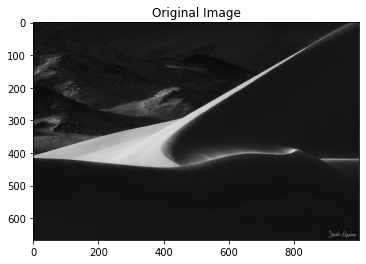

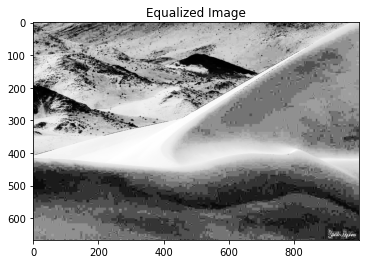

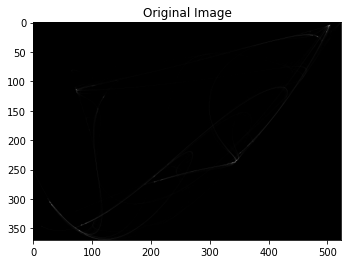

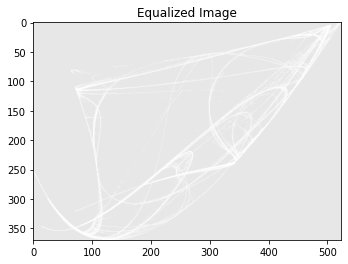

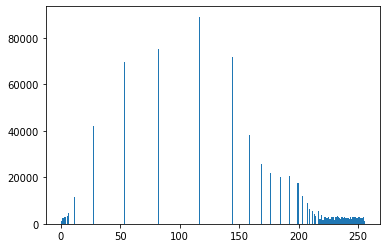

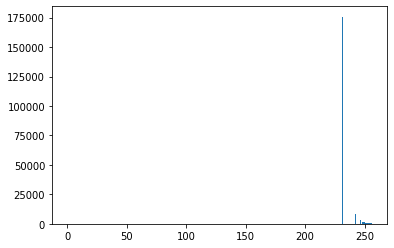

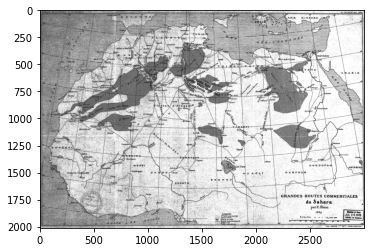

True

In [27]:
practice_range1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'practice_range1.jpg'),0)
hist = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'hist.jpg'),0)

transform_practice_range1 = histEqualization(practice_range1)
transform_hist = histEqualization(hist)

# print(temp)
plt.hist(transform_practice_range1.ravel(),256,[0,256])
plt.show()
plt.hist(transform_hist.ravel(),256,[0,256])
plt.show()

# px.imshow(temp,color_continuous_scale='gray',range_color=[0,255]).show()
# px.imshow(hist,color_continuous_scale='gray',range_color=[0,255]).show()


transformed = histMatching(map_img,sat_map_img)
# print(transformed[:,:,0].shape)
plt.imshow(transformed,cmap='gray')
plt.show()

# px.imshow(transformed,color_continuous_scale='gray',range_color=[0,255]).show()
cv2.imwrite(os.path.join(IMAGES_FOLDER_PATH, 'q4_4.jpg'), transformed)

# plt.hist(map_img.ravel(),256,[0,256])
# plt.show()
# plt.hist(sat_map_img.ravel(),256,[0,256])
# plt.show()
# plt.hist(transformed.ravel(),256,[0,256])
# plt.show()

# Question 7

### 1)

In [28]:
def piecewiseLinTransform(img,k1,k2,a,b):
    img = img/255
    img_copy = np.copy(img)
    mask = np.bitwise_and((img_copy)>=a,(img_copy)<=b)
    transform = k1*img_copy[mask==1]+k2
    img[mask==1] = transform
#     plt.imshow(mask*255,cmap='gray',vmin=0,vmax=255)
#     plt.show()
    return (255*img).astype(int)

### 2)

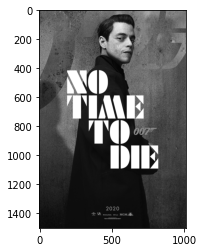

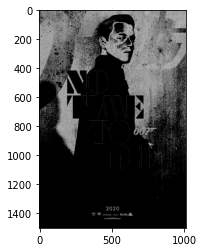

True

In [61]:
bondvillain1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'bondvillain1.jpg'),0)
plt.imshow(bondvillain1,cmap='gray',vmin=0,vmax=255)
plt.show()

transformed = np.copy(bondvillain1)
transformed = piecewiseLinTransform(transformed,0,0,0,0.3)
transformed = piecewiseLinTransform(transformed,1.33,0,0.3,0.6)
transformed = piecewiseLinTransform(transformed,-2,2,0.6,0.8)
transformed = piecewiseLinTransform(transformed,0,0,0.8,1)
# transformed = piecewiseLinTransform(transformed,0,0,1,1.1)

plt.imshow(transformed,cmap='gray',vmin=0,vmax=255)
plt.show()
cv2.imwrite(os.path.join(IMAGES_FOLDER_PATH, 'bondvillain1_piecewise.jpg'), transformed)


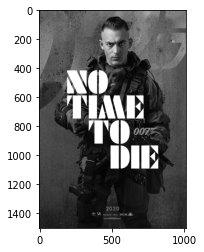

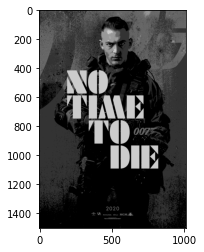

True

In [62]:
bondvillain2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'bondvillain2.jpg'),0)
plt.imshow(bondvillain2,cmap='gray',vmin=0,vmax=255)
plt.show()

transformed = np.copy(bondvillain2)
transformed = piecewiseLinTransform(transformed,0,0,0,0.2)
transformed = piecewiseLinTransform(transformed,0,0.2,0.2,0.4)
transformed = piecewiseLinTransform(transformed,0,0.4,0.4,0.6)
transformed = piecewiseLinTransform(transformed,0,0.6,0.6,0.8)
transformed = piecewiseLinTransform(transformed,0,0.8,0.8,1)
# transformed = piecewiseLinTransform(transformed,0,1,1,1.1)

plt.imshow(transformed,cmap='gray',vmin=0,vmax=255)
plt.show()
cv2.imwrite(os.path.join(IMAGES_FOLDER_PATH, 'bondvillain2_piecewise.jpg'), transformed)


### For the first pic bondvillain1.jpg, from the piecewise function it is clear that majority of the bright pixels were made dark. The text overlay which was in white became black beacuse of it. Some parts of the text overlay in the back became more visibly clear because of the shape of the piececwise function

### For the first pic bondvillain2.jpg, the intensities closer to white became white and the ones closer to black became black in this case. The text overlay in this case turned to grey from white because of the step function i.e., the piecewise transformation shape.

### 3)

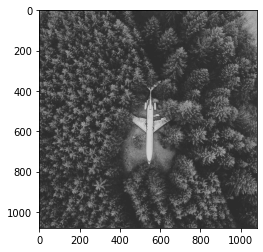

In [31]:
random_pic = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'random_pic.jpg'),0)
plt.imshow(random_pic,cmap='gray',vmin=0,vmax=255)
plt.show()

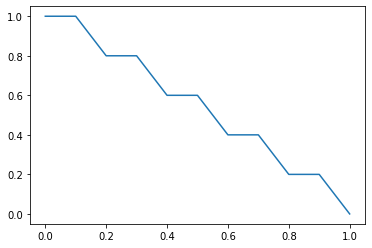

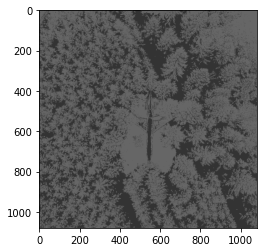

In [32]:
transformed = np.copy(random_pic)
transformed = piecewiseLinTransform(transformed,0,1,0,0.2)
transformed = piecewiseLinTransform(transformed,0,0.8,0.2,0.4)
transformed = piecewiseLinTransform(transformed,0,0.6,0.4,0.6)
transformed = piecewiseLinTransform(transformed,0,0.4,0.6,0.8)
transformed = piecewiseLinTransform(transformed,0,0.2,0.8,1)
transformed = piecewiseLinTransform(transformed,0,0,1,1.1)

x = np.arange(0.0,1.1,0.1)
func = np.arange(0.0,1.1,0.1)
func[0:2] = 1
func[2:4] = 0.8
func[4:6] = 0.6
func[6:8] = 0.4
func[8:10] = 0.2
func[10:11] = 0.0

plt.plot(x,func)
plt.show()

plt.imshow(transformed,cmap='gray',vmin=0,vmax=255)
plt.show()

# Question 8

### 1)

In [33]:
def gammaTransform(img,gamma):
    img = img/255
    transformed = np.power(img,gamma)
    transformed = (transformed*255).astype(int)
    return transformed

### 2)

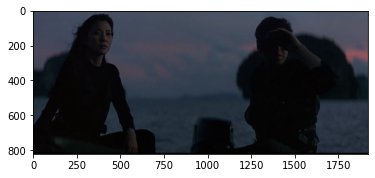

In [34]:
stealth = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'stealth.png'))
stealth = cv2.cvtColor(stealth, cv2.COLOR_BGR2RGB)

plt.imshow(stealth)
plt.show()

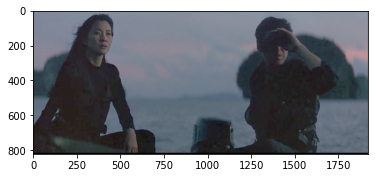

In [35]:
transform = gammaTransform(stealth,0.5)
plt.imshow(transform)
plt.show()

# Gamma  = 0.5

### The value of $\gamma$  used is 0.5

### 3)

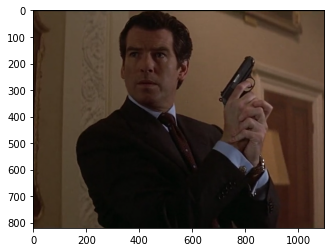

In [36]:
unstealth = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'unstealth.png'))
unstealth = cv2.cvtColor(unstealth, cv2.COLOR_BGR2RGB)

plt.imshow(unstealth)
plt.show()

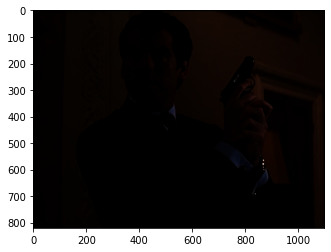

In [37]:
transform = gammaTransform(unstealth,3.5)
plt.imshow(transform)
plt.show()

# Gamma  = 3.5

### The value of $\gamma$  used is 3.5

### 4)

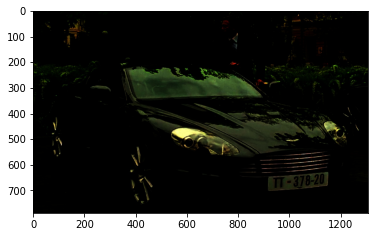

In [38]:
aston_invisible = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'aston_invisible.jpg'))
aston_invisible = cv2.cvtColor(aston_invisible, cv2.COLOR_BGR2RGB)

plt.imshow(aston_invisible)
plt.show()

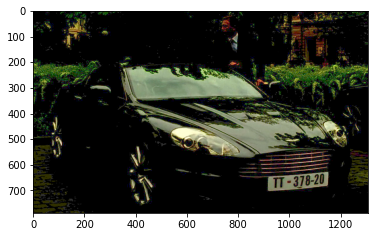

(788, 1307, 3)


True

In [39]:
transform = gammaTransform(aston_invisible,0.3)
plt.imshow(transform,vmin=0,vmax=255)
# plt.colorbar()
plt.show()

print(transform.shape)

# px.imshow(transform).show()
cv2.imwrite(os.path.join(IMAGES_FOLDER_PATH, 'aston_visible.png'), transform[:,:,::-1])
# cv2.imwrite(os.path.join(IMAGES_FOLDER_PATH, 'aston_visible.png'), transform)
# Gamma  = 0.3

#### The Number Plate of the Aston Martin is  " TT 378-20"
#### The value of $\gamma$  used is 0.3

# Question 9

In [40]:
james1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'james1.jpg'),0)
# plt.imshow(james1,cmap='gray')
# plt.show()
james2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'james2.jpg'),0)
# plt.imshow(james2,cmap='gray')
# plt.show()
james3 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'james3.jpg'),0)
# plt.imshow(james3,cmap='gray')
# plt.show()
james4 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'james4.jpg'),0)
# plt.imshow(james4,cmap='gray')
# plt.show()

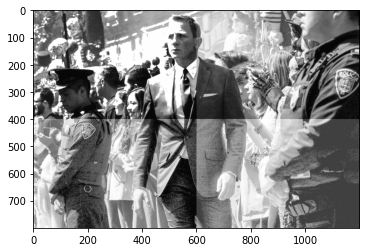

In [41]:
temp =  np.full((800,1200),0)
temp[0:400,0:600] = james1
temp[400:800,0:600] = james3
temp[0:400,600:1200] = james2
temp[400:800,600:1200] = james4

# print(temp.shape)

plt.imshow(temp,cmap='gray')
plt.show()
# px.imshow(temp,color_continuous_scale='gray',range_color=[0,255]).show()

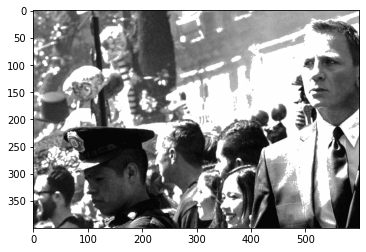

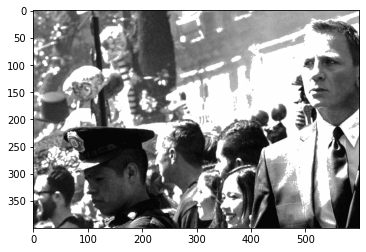

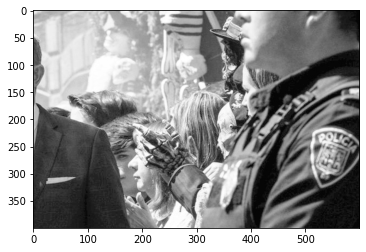

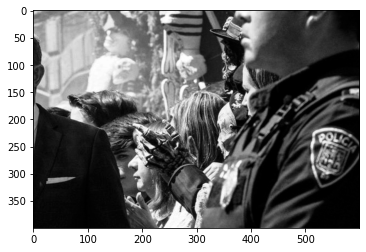

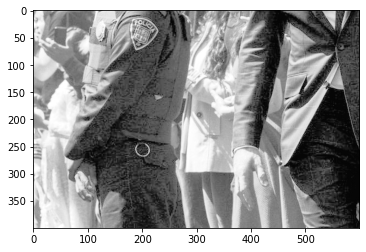

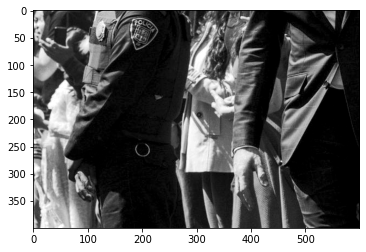

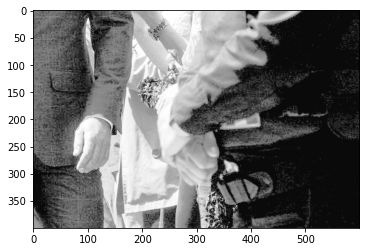

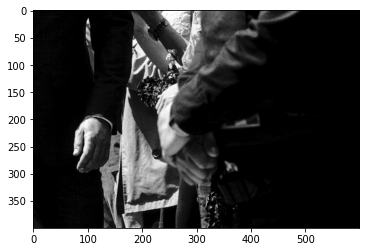

In [42]:
# Image Transformations

plt.imshow(james1,cmap='gray')
plt.show()
# plt.hist(james1.ravel(),256,[0,256])
# plt.show()
# transform1 = histEqualization(james1)
# transform1 = gammaTransform(james1,1.2)
transform1 =james1
plt.imshow(transform1,cmap='gray')
plt.show()
# plt.hist(transform1.ravel(),256,[0,256])
# plt.show()

plt.imshow(james2,cmap='gray')
plt.show()
# plt.hist(james2.ravel(),256,[0,256])
# plt.show()
transform2 = gammaTransform(james2,2)
plt.imshow(transform2,cmap='gray')
plt.show()
# plt.hist(transform2.ravel(),256,[0,256])
# plt.show()

plt.imshow(james3,cmap='gray')
plt.show()
# plt.hist(james3.ravel(),256,[0,256])
# plt.show()
# transform3 = histEqualization(james3)
transform3 = gammaTransform(james3,2.8)
plt.imshow(transform3,cmap='gray')
plt.show()
# plt.hist(transform3.ravel(),256,[0,256])
# plt.show()

plt.imshow(james4,cmap='gray')
plt.show()
# plt.hist(james4.ravel(),256,[0,256])
# plt.show()
# transform4 = histEqualization(james4)
transform4 = gammaTransform(james4,6.8)
plt.imshow(transform4,cmap='gray')
plt.show()
# plt.hist(transform4.ravel(),256,[0,256])
# plt.show()

#### FINAL TRANSFORMATION

(800, 1200)


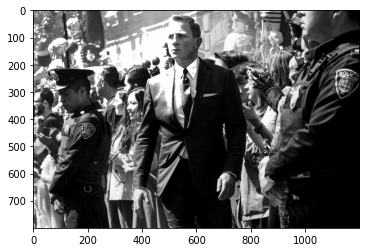

In [43]:
final_img =  np.full((800,1200),0)
final_img[0:400,0:600] = transform1
final_img[400:800,0:600] = transform3
final_img[0:400,600:1200] = transform2
final_img[400:800,600:1200] = transform4

print(final_img.shape)

plt.imshow(final_img,cmap='gray')
plt.show()
# px.imshow(temp,color_continuous_scale='gray',range_color=[0,255]).show()